In [96]:
#IMPORTING PACKAGAES######

from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [147]:
##READING IN DATA#####
#Reformatting data into a timeseries via converting string values to datetime values ####
#indexing that dataset with the time column#####

path = pd.read_csv(r"C:\Users\Vinnie\OneDrive\Desktop\Covid_ML.csv")
path['Date'] = pd.to_datetime(path['Date'],infer_datetime_format=True)
indexedDataset = path.set_index(['Date'])
indexedDataset.head(5)

,New Deaths,7-Day Moving Avg,New Cases,7-Day Moving Avg.1,NDLag1,New Deaths_Diff,New Cases_Diff,7-Day Moving Avg_Diff,Doses administered per 100 people,Total doses administered,Pct_Population_Vaccination,Pct_Population_Fully_Vaccination,Pneumonia_Influenza2019_Number,Pneumonia_Influenza2019_Percent,Pneumonia_Influenza2020_Number,Pneumonia_Influenza2020_Percent
Date,,,,,,,,,,,,,,,,
2022-06-26,12.0,288.0,39462.0,102630.0,241.0,-229.0,-69018.0,-19.0,16,6066579,14.0,12.0,65.24,17.46,64.7,17.19
2022-06-25,49.0,298.0,35931.0,102898.0,12.0,37.0,-3531.0,10.0,100,2840948,46.0,43.0,57311.00,0.51,40651.0,0.52
2022-06-24,378.0,301.0,163697.0,103181.0,49.0,329.0,127766.0,3.0,35,15205854,18.0,15.0,55587.00,0.49,36848.0,0.48
2022-06-23,433.0,300.0,104333.0,98200.0,378.0,55.0,-59364.0,-1.0,56,17896626,38.0,20.0,79550.00,0.70,53392.0,0.69
2022-06-22,563.0,278.0,132510.0,97793.0,433.0,130.0,28177.0,-22.0,225,101147280,91.0,83.0,15367.00,0.14,11534.0,0.15


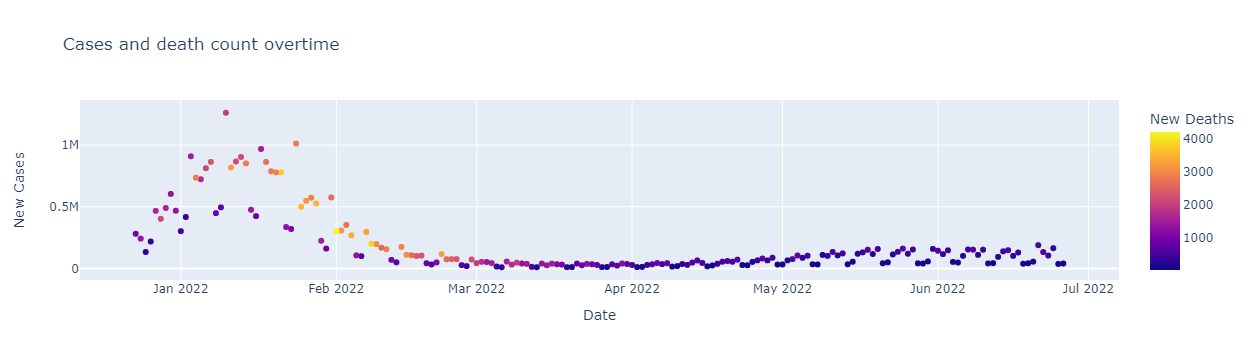

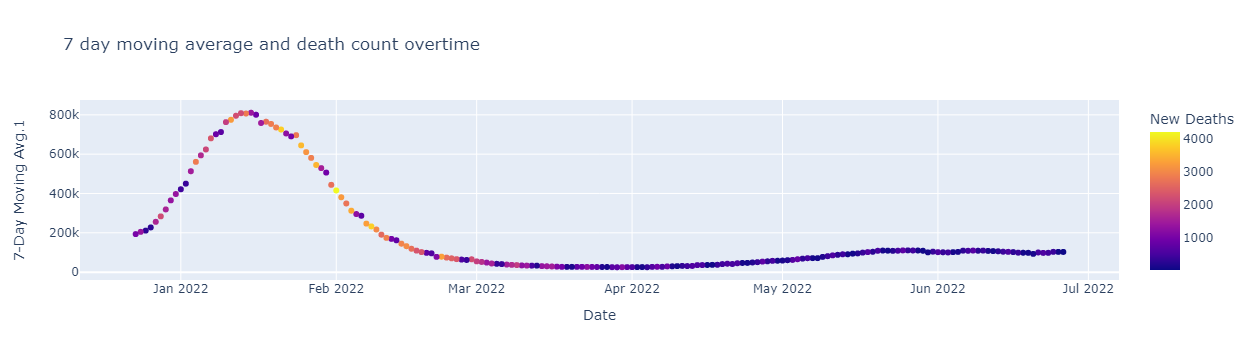

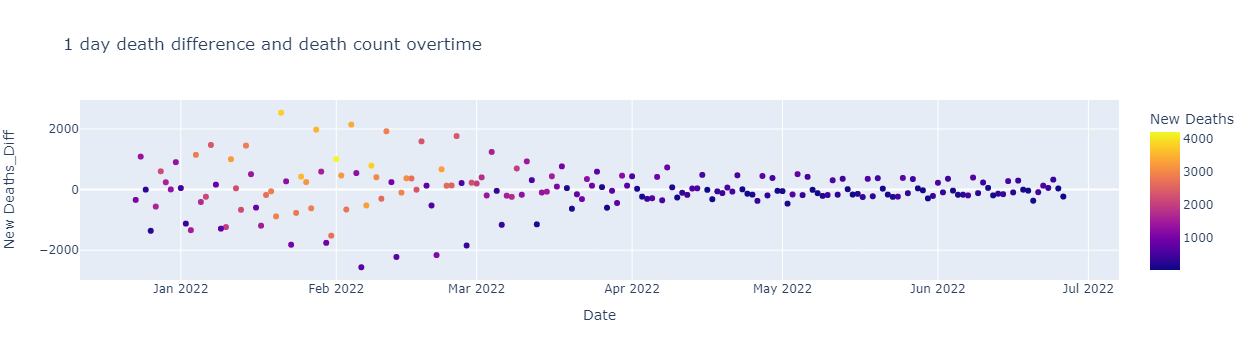

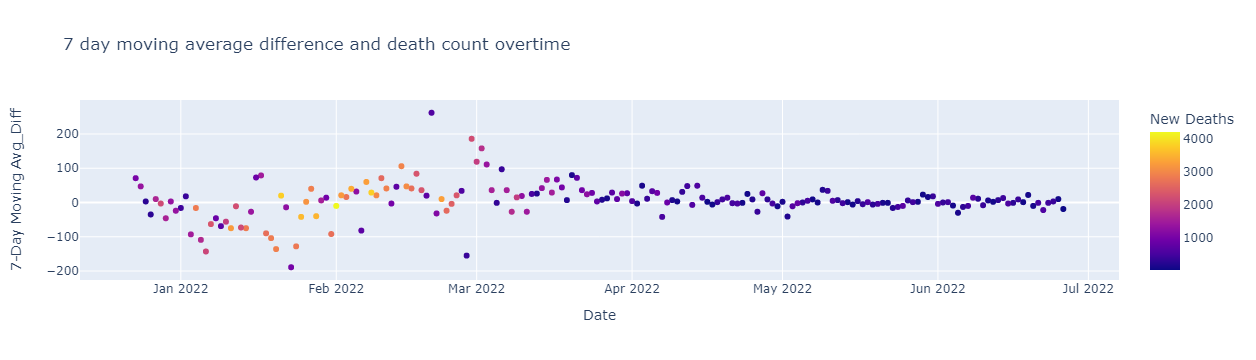

In [148]:
#PLOTTING New cases and New deaths overtime for visual refernce of distribution in a timeseries and setting pixelation dimensionality to 12 length units by 6 width units#####
fig = px.scatter(path, x="Date", y="New Cases", color='New Deaths', title="Cases and death count overtime")
(figsize:=(12,6))
fig.show()

fig = px.scatter(path, x="Date", y="7-Day Moving Avg.1", color='New Deaths', title="7 day moving average and death count overtime")
(figsize:=(12,6))
fig.show()

fig = px.scatter(path, x="Date", y="New Deaths_Diff", color='New Deaths', title="1 day death difference and death count overtime")
(figsize:=(12,6))
fig.show()

fig = px.scatter(path, x="Date", y="7-Day Moving Avg_Diff", color='New Deaths', title="7 day moving average difference and death count overtime")
(figsize:=(12,6))
fig.show()

In [149]:
###Using numpy functions to calculate rolling mean and rolling standard deviation with a window of 21 hours then print#####
rolmean = indexedDataset.rolling(window=7).mean()
rolstd = indexedDataset.rolling(window=7).std()
print(rolmean,rolstd)

             New Deaths  7-Day Moving Avg      New Cases  7-Day Moving Avg.1  \
Date                                                                           
2022-06-26          NaN               NaN            NaN                 NaN   
2022-06-25          NaN               NaN            NaN                 NaN   
2022-06-24          NaN               NaN            NaN                 NaN   
2022-06-23          NaN               NaN            NaN                 NaN   
2022-06-22          NaN               NaN            NaN                 NaN   
...                 ...               ...            ...                 ...   
2021-12-27  1268.142857       1219.714286  449843.285714       355954.142857   
2021-12-26  1252.142857       1203.857143  421429.857143       324162.571429   
2021-12-25  1228.714286       1190.714286  397283.142857       294126.714286   
2021-12-24  1231.571429       1187.714286  364921.285714       266650.285714   
2021-12-23  1185.142857       1194.42857

In [150]:
##First ADF statistical code format using New Deaths (our variable we want to predict)####

def ad_test(path):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adfuller(path['New Deaths'])

(-1.5073276281535466,
 0.5298834018591614,
 15,
 170,
 {'1%': -3.469413468959902,
  '5%': -2.8786964197028295,
  '10%': -2.5759166089965397},
 2451.968127369966)

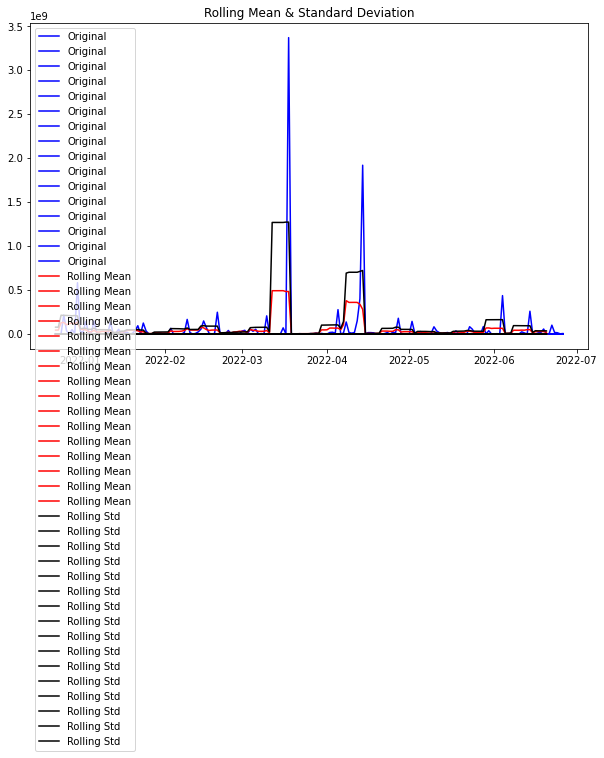

In [151]:
###Plotting mean and standard deviation of indexed dataset###
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [152]:
###Second Augmented Dickie format to check validity of first result####
##TEST STATISTIC IS EQUIVALENT TO FIRST TEST###
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['New Deaths'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -1.507328
p-value                          0.529883
#Lags Used                      15.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


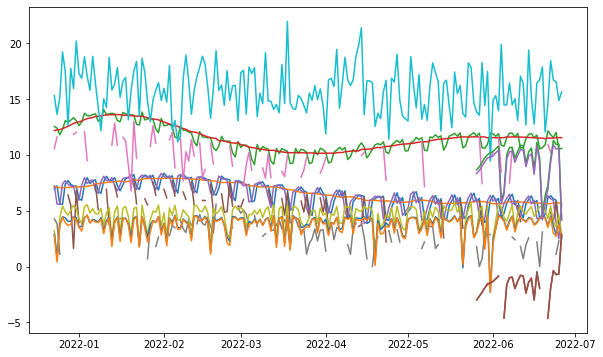

In [153]:
###LOGARITHMICALLY SCALING THE DATASET TO CHECK FOR STATIONARITY in visuals#####

indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

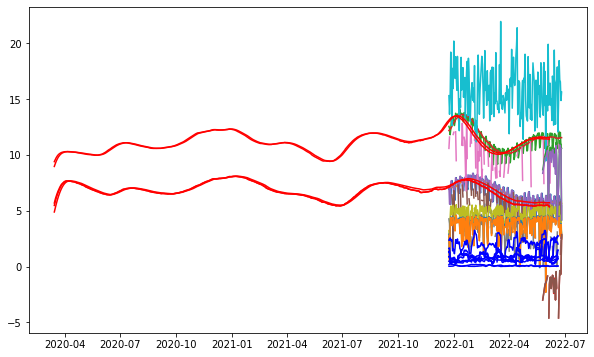

In [154]:
####DEVELOPING A STATIONARITY SERIES IN LOGARITHMIC FORM###

movingSTD = indexedDataset_logScale.rolling(window=7).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
plt.plot(movingSTD, color='blue')

In [155]:
###STEPWISE FITTING THE ARIMA MODEL FOR New Deaths ###

from pmdarima import auto_arima
stepwise_fit = auto_arima(path['New Deaths'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2840.841, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2959.360, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2961.186, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2938.044, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2957.373, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2886.854, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2880.781, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2832.450, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2859.317, Time=0.66 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2832.717, Time=0

In [156]:
##DEFINING THE TRAIN AND TEST FEATURES OF ARIMA TO 21 HOURS WINDOW DURATION
print(path.shape)
train=path.iloc[:-21]
test=path.iloc[-21:]
print(train.shape,test.shape)

(186, 17)
(165, 17) (21, 17)


In [157]:
####MODEL SUMMARY OF COVID ARIMA MODEL###
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['New Deaths'], order = (1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New Deaths   No. Observations:                  165
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -1255.981
Date:                Tue, 28 Jun 2022   AIC                           2527.963
Time:                        19:31:18   BIC                           2552.811
Sample:                             0   HQIC                          2538.049
                                - 165                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1010.9141    796.876      1.269      0.205    -550.933    2572.761
ar.L1          0.9874      0.011     86.497      0.000       0.965       1.010
ma.L1         -0.5470      0.061     -8.968      0.000      -0.667      -0.427
ma.L2         -0.6676      0.059    -11.277      0.000      -0.784      -0.552
ma.L3         -0.1859      0.077     -2.419      0.016      -0.336      -0.035
ma.L4          0.5628      0.071      7.910      0.000       0.423       0.702
ma.L5          0.1170      0.070      1.677      0.094      -0.020       0.254
sigma2      2.313e+05   2.25e+04     10.297      0.000    1.87e+05    2.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                25.62
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              14.10   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

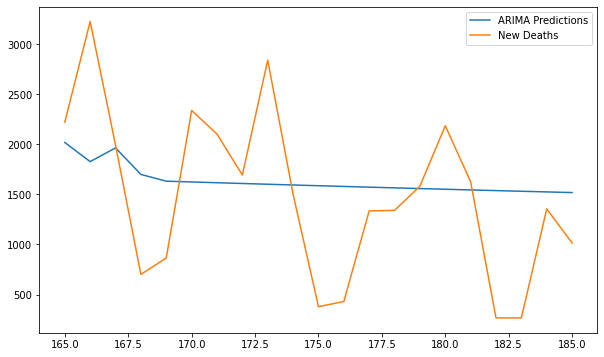

In [158]:
###Plotting ARIMA prediction###
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['New Deaths'].plot(legend=True)

In [159]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['New Deaths'].mean()
rmse=sqrt(mean_squared_error(pred,test['New Deaths']))
print(rmse)

776.7879828749051
